In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, writers
import matplotlib.animation as animation
%matplotlib notebook

time = 600
field_width = 64
field_length = 100
class Player_Team_1:

    # Словари для атрибутов в зависимости от роли
    speeds = {
        'central left defender': 3.5,
        'central right defender': 3.5,
        'left defender' : 4.5,
        'right defender': 4.5,
        'central right midfielder' : 4.0, 
        'central left midfielder' : 4.0,
        'central midfielder' : 4.0,
        'right midfielder' : 4.5,
        'left midfielder' : 4.5, 
        'left forward' : 5.0,
        'right forward' : 5.0,
        'central forward' : 5.0,
        'defensive midfielder' : 4.0
    }
    default_position = {
        'central right defender': [field_width / 2 + 8, -7*field_length/20 ],
        'central left defender': [field_width / 2 - 8, -7*field_length/20],
        'right defender' : [field_width - 10, -6*field_length/20],
        'left defender': [10, -6*field_length/20],
        'central right midfielder' : [field_width/2 + 8, -4*field_length/20],
        'central left midfielder' : [field_width/2 - 8, -4*field_length/20],
        'central midfielder' : [field_width/2, -4*field_length/20],
        'left midfielder' : [10, -1],
        'right midfielder' : [field_width - 10, -1], 
        'left forward' : [field_width/2 - 8, -2*field_length/20],
        'right forward' : [field_width/2 + 8, -2*field_length/20],
        'central forward' : [field_width/2, -2*field_length/20],
        'defensive midfielder' : [field_width/2, -5*field_length/20]
    }
    center_of_mass_attack = {
        'central right defender': [field_width / 2 + 8, 7*field_length/20 ],
        'central left defender': [field_width / 2 - 8, 7*field_length/20],
        'right defender' : [field_width - 10, 6*field_length/20],
        'left defender': [10, 6*field_length/20],
        'central left midfielder' : [field_width/2 - 8, 5*field_length/20],
        'central right midfielder' : [field_width/2 + 8, 5*field_length/20],
        'central midfielder' : [field_width/2, 5*field_length/20],
        'left midfielder' : [10, 4.5*field_length/20], 
        'right midfielder' : [field_width - 10, 4.5*field_length/20], 
        'left forward' : [field_width/2 - 8, 3.5*field_length/20],
        'right forward' : [field_width/2 + 8, 3.5*field_length/20],
        'central forward' : [field_width/2, 3.5*field_length/20],
        'defensive midfielder' : [field_width/2, 6*field_length/20]
    }
    center_of_mass_defense = {
        'central right defender': [field_width / 2 + 8, -8*field_length/20 ],
        'central left defender': [field_width / 2 - 8, -8*field_length/20],
        'right defender' : [field_width - 10, -7*field_length/20],
        'left defender': [10, -7*field_length/20],
        'central left midfielder' : [field_width/2 - 8, -6*field_length/20],
        'central right midfielder' : [field_width/2 + 8, -6*field_length/20],
        'central midfielder' : [field_width/2, -6*field_length/20],
        'left midfielder' : [10, -6*field_length/20], 
        'right midfielder' : [field_width - 10, -6*field_length/20], 
        'right forward' : [field_width/2 + 8, -4*field_length/20],
        'left forward' : [field_width/2 - 8, -4*field_length/20],
        'central forward' : [field_width/2, -4*field_length/20],
        'defensive midfielder' : [field_width/2, -5*field_length/20],
        
    }
    

    def __init__(self, role):
        self.team_id = 0
        self.role = role
        self.speed = Player_Team_1.speeds[role]
        self.position = np.array(Player_Team_1.default_position[role])
        self.center_defense = np.array(Player_Team_1.center_of_mass_defense[role])
        self.center_attack = np.array(Player_Team_1.center_of_mass_attack[role])

    def move(self, ball_position, own_team_has_ball):
        # Выбор направления движения
        max_control_distance = 3
        frame_interval_ms = 20
        # Переводим интервал в секунды
        frame_interval_sec = frame_interval_ms / 100.0
        prob = np.random.rand()
        
        if not own_team_has_ball:
            if np.linalg.norm(self.position - ball_position) > max_control_distance:
                if prob < 0.1:
                    direction = np.array(ball_position) - self.position
                elif prob < 0.8:
                    direction = np.array(self.center_defense) - self.position
                else:
                    direction = np.random.uniform(-1, 1, 2)
            else:
                if prob < 0.6:
                    direction = np.array(ball_position) - self.position
                elif prob < 0.9:
                    direction = np.array(self.center_defense) - self.position
                else:
                    direction = np.random.uniform(-1, 1, 2)
        else:
            if prob < 0.2:
                direction = np.array(ball_position) - self.position
            elif prob < 0.9:
                direction = np.array(self.center_attack) - self.position
            else:
                direction = np.random.uniform(-1, 1, 2)
        
#         if prob < 0.2:
#             direction = np.array(ball_position) - self.position
#         elif prob < 0.6:
#             center_target = self.center_attack if own_team_has_ball else self.center_defense
#             direction = np.array(center_target) - self.position
#         else:
#             direction = np.random.uniform(-1, 1, 2)
        
        # Нормирование вектора направления
        norm_direction = direction / np.linalg.norm(direction) if np.linalg.norm(direction) != 0 else np.zeros(2)
        
        speed_modifier = np.random.uniform(0.9, 1.1) if own_team_has_ball else np.random.uniform(1.1, 1.5)
        # Перемещение игрока
        self.position = self.position + norm_direction * self.speed * np.random.rand()*frame_interval_sec*speed_modifier
        self.position = np.clip(self.position, [0, -field_length/2], [field_width, field_length/2])

In [2]:
class Player_Team_2:
    # Словари для атрибутов в зависимости от роли
    speeds = {
        'central left defender': 3.5,
        'central right defender': 3.5,
        'left defender' : 4.5,
        'right defender': 4.5,
        'central right midfielder' : 4.0, 
        'central left midfielder' : 4.0,
        'central midfielder' : 4.0,
        'right midfielder' : 4.5,
        'left midfielder' : 4.5, 
        'left forward' : 5.0,
        'right forward' : 5.0,
        'central forward' : 5.0,
        'defensive midfielder' : 4.0
    }
    default_position = {
        'central right defender': [field_width / 2 - 8, 5*field_length/20],
        'central left defender': [field_width / 2 + 8, 5*field_length/20],
        'left defender' : [field_width - 10, 4*field_length/20],
        'right defender': [10, 4*field_length/20],
        'central right midfielder' : [field_width/2 - 8, 4*field_length/20],
        'central left midfielder' : [field_width/2 + 8, 4*field_length/20],
        'central midfielder' : [field_width/2, 4*field_length/20],
        'right midfielder' : [10, 2*field_length/20], 
        'left midfielder' : [field_width - 10, 2*field_length/20], 
        'left forward' : [field_width/2 + 2, 3],
        'right forward' : [field_width/2 - 0.5, 0],
        'central forward' : [field_width/2, 2*field_length/20],
        'defensive midfielder' : [field_width/2, 5*field_length/20]
    }
    center_of_mass_attack = {
        'central left defender': [field_width / 2 + 8, -3*field_length/20 ],
        'central right defender': [field_width / 2 - 8, -3*field_length/20],
        'left defender' : [field_width - 10, -4*field_length/20],
        'right defender': [10, -4*field_length/20],
        'central right midfielder' : [field_width/2 - 8, -6*field_length/20],
        'central left midfielder' : [field_width/2 + 8, -6*field_length/20],
        'central midfielder' : [field_width/2, -6*field_length/20],
        'right midfielder' : [10, -7*field_length/20], 
        'left midfielder' : [field_width - 10, -7*field_length/20], 
        'left forward' : [field_width/2 + 8, -8*field_length/20],
        'right forward' : [field_width/2 - 8, -8*field_length/20],
        'central forward' : [field_width/2, -8*field_length/20],
        'defensive midfielder' : [field_width/2, -5*field_length/20]
    }
    center_of_mass_defense = {
        'central left defender': [field_width / 2 + 8, 7*field_length/20 ],
        'central right defender': [field_width / 2 - 8, 7*field_length/20],
        'left defender' : [field_width - 10, 6*field_length/20],
        'right defender': [10, 6*field_length/20],
        'central right midfielder' : [field_width/2 - 8, 5*field_length/20],
        'central left midfielder' : [field_width/2 + 8, 5*field_length/20],
        'central midfielder' : [field_width/2, 5*field_length/20],
        'right midfielder' : [10, 4.5*field_length/20], 
        'left midfielder' : [field_width - 10, 4.5*field_length/20], 
        'left forward' : [field_width/2 + 8, 3.5*field_length/20],
        'right forward' : [field_width/2 - 8, 3.5*field_length/20],
        'central forward' : [field_width/2, 3.5*field_length/20],
        'defensive midfielder' : [field_width/2, 6*field_length/20]
    }

    def __init__(self, role):
        self.team_id = 1
        self.role = role
        self.speed = Player_Team_2.speeds[role]
        self.position = np.array(Player_Team_2.default_position[role])
        self.center_defense = np.array(Player_Team_2.center_of_mass_defense[role])
        self.center_attack = np.array(Player_Team_2.center_of_mass_attack[role])

    def move(self, ball_position, own_team_has_ball):
        max_control_distance = 3
        # Выбор направления движения
        prob = np.random.rand()
        frame_interval_ms = 20
        # Переводим интервал в секунды
        frame_interval_sec = frame_interval_ms / 100.0
        if not own_team_has_ball:
            if np.linalg.norm(self.position - ball_position) > max_control_distance:
                if prob < 0.1:
                    direction = np.array(ball_position) - self.position
                elif prob < 0.8:
                    direction = np.array(self.center_defense) - self.position
                else:
                    direction = np.random.uniform(-1, 1, 2)
            else:
                if prob < 0.6:
                    direction = np.array(ball_position) - self.position
                elif prob < 0.9:
                    direction = np.array(self.center_defense) - self.position
                else:
                    direction = np.random.uniform(-1, 1, 2)
        else:
            if prob < 0.2:
                direction = np.array(ball_position) - self.position
            elif prob < 0.9:
                direction = np.array(self.center_attack) - self.position
            else:
                direction = np.random.uniform(-1, 1, 2)
        
#         direction_toball = np.array(ball_position) - self.position
#         direction_toball = direction_toball / np.linalg.norm(direction_toball) if np.linalg.norm(direction_toball) != 0 else np.zeros(2)
#         centre_target = self.center_attack if own_team_has_ball else self.center_defense
#         direction_centre = np.array(center_target) - self.position
#         direction_centre = direction_centre / np.linalg.norm(direction_centre) if np.linalg.norm(direction_centre) != 0 else np.zeros(2)
#         random_direction = np.random.uniform(-1, 1, 2)
#         random_direction = random_direction / np.linalg.norm(drandom_direction) if np.linalg.norm(random_direction) != 0 else np.zeros(2)
#         direction = direction_toball * 0.3 + direction_centre*0.6 + random_direction*0.1
        
        # Нормирование вектора направления
        norm_direction = direction / np.linalg.norm(direction) if np.linalg.norm(direction) != 0 else np.zeros(2)
        speed_modifier = np.random.uniform(0.9, 1.1) if own_team_has_ball else np.random.uniform(1.1, 1.5)
        # Перемещение игрока
        self.position = self.position + norm_direction * self.speed * np.random.rand()*frame_interval_sec * speed_modifier
        self.position = np.clip(self.position, [0, -field_length/2], [field_width, field_length/2])

In [3]:
class Team:
    def __init__(self, players, team_id):
        self.players = players
        self.team_id = team_id

    def update_positions(self, ball_position, own_team_has_ball):
        for player in self.players:
            player.move(ball_position, own_team_has_ball)

In [4]:
class Ball:
    def __init__(self, position, owner):
        self.position = np.array(position)
        self.owner = owner # Игрок, владеющий мячом

    def update_position(self, teams, field_dims):
        field_length, field_width = field_dims
        if self.owner is not None:
            # Проверить, сохраняется ли владение мячом
            closest_opponent_distance, closest_opponent = self.find_closest_opponent(teams)
            if closest_opponent_distance < 0.5:
                # Возможная потеря мяча
                prob = np.random.rand()
                if prob < 0.2:
                    self.owner = closest_opponent  # Смена владельца мяча
                elif prob < 0.8:
                    self.pass_ball(self.owner.team_id, teams)  # Пас сокоманднику
                else:
                    self.position = self.owner.position
            else:
                # Владелец сохраняется, определить следующее действие
                prob = np.random.rand()
                if prob < 0.4:
                    self.position = self.owner.position
                elif prob < 0.8:
                    self.pass_ball(self.owner.team_id, teams)
                else:
                    self.position = self.position + np.random.uniform(-1, 1, 2)  # Рандомное движение мяча
        else:
            # Найти нового владельца мяча
            self.owner = self.find_new_owner(teams)

        self.position = np.clip(self.position, [0, -field_length/2], [field_width, field_length/2])

    def find_new_owner(self, teams):
        # Найти игрока, который ближе всего к мячу
        closest_player = None
        min_distance = np.inf
        for team in teams:
            for player in team.players:
                distance = np.linalg.norm(player.position - self.position)
                if distance < min_distance and distance < ball_control_distance:
                    min_distance = distance
                    closest_player = player
        return closest_player

    def find_closest_opponent(self, teams):
        # Найти ближайшего оппонента к владельцу мяча
        closest_distance = np.inf
        closest_opponent = None
        for team in teams:
            if team.team_id != self.owner.team_id:
                for player in team.players:
                    distance = np.linalg.norm(player.position - self.owner.position)
                    if distance < closest_distance:
                        closest_distance = distance
                        closest_opponent = player
        return closest_distance, closest_opponent

    def pass_ball(self, team_id, teams):
        # Выбрать сокомандника для передачи
        teammates = [player for team in teams if team.team_id == team_id for player in team.players]
        if teammates:
            self.owner = np.random.choice(teammates)

<IPython.core.display.Javascript object>


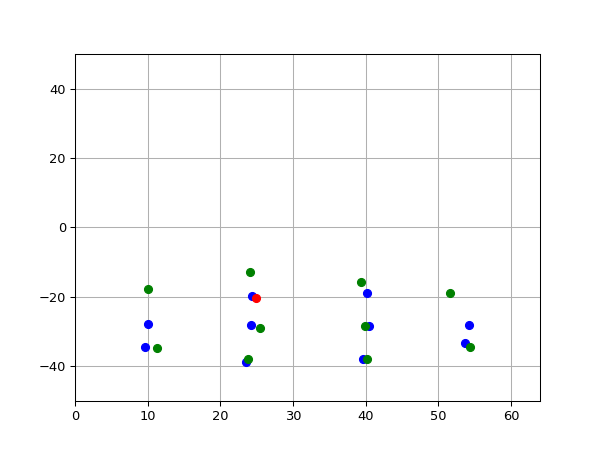

Total collisions: 0
Total index swaps: 0


In [5]:
class FootballMatch:
    def __init__(self, team1, team2, ball):
        self.team1 = team1
        self.team2 = team2
        self.ball = ball
        self.fig, self.ax = plt.subplots()
        self.ax.grid()
        self.ax.set_xlim(0, 64)
        self.ax.set_ylim(-50, 50)
        self.player_dots_1 = [self.ax.plot(pos.position[0], pos.position[1], 'bo')[0] for pos in team1.players]
        self.player_dots_2 = [self.ax.plot(pos.position[0], pos.position[1], 'go')[0] for pos in team2.players]
        self.ball_dot = self.ax.plot(ball.position[0], ball.position[1], 'ro')[0]
        self.anim = None
        self.collisions = 0
        self.index_swaps = 0
        
    def animate(self, frame):
        # Очистка содержимого поля
        # Обновление позиций игроков и мяча
        own_team_has_ball = self.ball.owner.team_id == self.team1.team_id
        self.team1.update_positions(self.ball.position, own_team_has_ball)
        self.team2.update_positions(self.ball.position, not own_team_has_ball)
        self.ball.update_position([self.team1, self.team2], (100, 64))
        # Отрисовка игроков и мяча
        for i, player in enumerate(self.player_dots_1):
            player.set_data(self.team1.players[i].position[0], self.team1.players[i].position[1])
        for i, player in enumerate(self.player_dots_2):
            player.set_data(self.team2.players[i].position[0], self.team2.players[i].position[1])
        #for i, player in enumerate(self.team1.players):
         #   self.player_dots_1[i].set_data(player.position[0], player.position[1])
        #for i, player in enumerate(self.team2.players):
         #   self.player_dots_2[i].set_data(player.position[0], player.position[1])
        self.ball_dot.set_data(self.ball.position[0], self.ball.position[1])
        #for player in self.team1.players + self.team2.players:
            #self.ax.plot(player.position[0], player.position[1], 'go' if player.team_id == 1 else 'bo')
        #self.ax.plot(self.ball.position[0], self.ball.position[1], 'ro')
        return self.player_dots_1 + self.player_dots_2 + [self.ball_dot]
    def detect_collisions(self):
        all_players = self.team1.players + self.team2.players
        for i, player in enumerate(all_players[:10]):
            for other_player in all_players[10:]:
                if np.linalg.norm(player.position - other_player.position) < 0.3:
                    self.collisions += 1
                    if np.random.rand() < 0.1:
                        self.index_swaps += 1

    def start_animation(self):
        self.anim = FuncAnimation(self.fig, self.animate, frames=600, interval=100, blit = True)
        plt.show()
        
    def print_output(self):
        print(f"Total collisions: {self.collisions}")
        print(f"Total index swaps: {self.index_swaps}")


player_roles = ['central left defender', 'central right defender', 'left defender', 'right defender', 
                'central right midfielder', 'central left midfielder', 'right midfielder', 'left midfielder', 
                'left forward', 'right forward']
# Создание и запуск матча (пример)
team1_players = [Player_Team_1(role) for role in player_roles]
team2_players = [Player_Team_2(role) for role in player_roles]  

# Инициализация и запуск матча
team1 = Team(team1_players, 0)
team2 = Team(team2_players, 1)
ball = Ball([32, 0], team2.players[9])
match = FootballMatch(team1, team2, ball)
match.start_animation()
# f = r"C:\Users\mirni\Downloads\animation123.gif" 
# writergif = animation.PillowWriter(fps=30) 
# match.anim.save(f, writer=writergif)
match.print_output()